In [2]:
###IMPORTNG LIBRARIES 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

%matplotlib inline

C:\Users\lesle\AppData\Local\Temp\ipykernel_12276\2094921506.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
### IMPORTING THE DATA FROM EXCEL

Tesco_df=pd.read_csv(r"C:\Users\lesle\Downloads\Modelling Task Data (1).csv")

In [4]:
Tesco_df


RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619      geo1  Female   42   
1             2    15647311       Hill          608      geo2  Female   41   
2             3    15619304       Onio          502      geo1  Female   42   
3             4    15701354       Boni          699      geo1  Female   39   
4             5    15737888   Mitchell          850      geo2  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771      geo1    Male   39   
9996       9997    15569892  Johnstone          516      geo1    Male   35   
9997       9998    15584532        Liu          709      geo1  Female   36   
9998       9999    15682355  Sabbatini          772      geo3    Male   42   
9999      10000    15628319     Walker          792      geo1  Female   28   

     Tenure    Balance  HasClaimed  NumOfProducts  HasCrCard  IsMember  \
0         2       0.00           0              1          1         1   
1         1   83807.86           0              1          0         1   
2         8  159660.80           0              3          1         0   
3         1       0.00           0              2          0         0   
4         2  125510.82           0              1          1         1   
...     ...        ...         ...            ...        ...       ...   
9995      5       0.00           0              2          1         0   
9996     10   57369.61           0              1          1         1   
9997      7       0.00           0              1          0         1   
9998      3   75075.31           0              2          1         0   
9999      4  130142.79           1              1          1         0   

      Marketing12m     Salary  Exited  
0              NaN  101348.88       1  
1              NaN  112542.58       0  
2              NaN  113931.57       1  
3              NaN   93826.63       0  
4              0.0   79084.10       0  
...            ...        ...     ...  
9995           NaN   96270.64       0  
9996           NaN  101699.77       0  
9997           0.0   42085.58       1  
9998           NaN   92888.52       1  
9999           NaN   38190.78       0  

[10000 rows x 16 columns]

In [5]:
Tesco_df.head(15)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0           1    15634602  Hargrave          619      geo1  Female   42   
1           2    15647311      Hill          608      geo2  Female   41   
2           3    15619304      Onio          502      geo1  Female   42   
3           4    15701354      Boni          699      geo1  Female   39   
4           5    15737888  Mitchell          850      geo2  Female   43   
5           6    15574012       Chu          645      geo2    Male   44   
6           7    15592531  Bartlett          822      geo1    Male   50   
7           8    15656148    Obinna          376      geo3  Female   29   
8           9    15792365        He          501      geo1    Male   44   
9          10    15592389        H?          684      geo1    Male   27   
10         11    15767821    Bearce          528      geo1    Male   31   
11         12    15737173   Andrews          497      geo2    Male   24   
12         13    15632264       Kay          476      geo1  Female   34   
13         14    15691483      Chin          549      geo1  Female   25   
14         15    15600882     Scott          635      geo2  Female   35   

   Tenure    Balance  HasClaimed  NumOfProducts  HasCrCard  IsMember  \
0       2       0.00           0              1          1         1   
1       1   83807.86           0              1          0         1   
2       8  159660.80           0              3          1         0   
3       1       0.00           0              2          0         0   
4       2  125510.82           0              1          1         1   
5       8  113755.78           0              2          1         0   
6       7       0.00           0              2          1         1   
7       4  115046.74           0              4          1         0   
8       4  142051.07           1              2          0         1   
9       2  134603.88           0              1          1         1   
10      6  102016.72           1              2          0         0   
11      3       0.00           0              2          1         0   
12     10       0.00           0              2          1         0   
13      5       0.00           0              2          0         0   
14      7       0.00           0              2          1         1   

    Marketing12m     Salary  Exited  
0            NaN  101348.88       1  
1            NaN  112542.58       0  
2            NaN  113931.57       1  
3            NaN   93826.63       0  
4            0.0   79084.10       0  
5            NaN  149756.71       1  
6            NaN   10062.80       0  
7            NaN  119346.88       1  
8            0.0   74940.50       0  
9            0.0   71725.73       0  
10           NaN   80181.12       0  
11           0.0   76390.01       0  
12           0.0   26260.98       0  
13           0.0  190857.79       0  
14           NaN   65951.65       0

In [6]:
Tesco_df.tail(15)

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
9985       9986    15586914       Nepean          659      geo1    Male   36   
9986       9987    15581736     Bartlett          673      geo3    Male   47   
9987       9988    15588839      Mancini          606      geo2    Male   30   
9988       9989    15589329      Pirozzi          775      geo1    Male   30   
9989       9990    15605622     McMillan          841      geo2    Male   28   
9990       9991    15798964   Nkemakonam          714      geo3    Male   33   
9991       9992    15769959  Ajuluchukwu          597      geo1  Female   53   
9992       9993    15657105  Chukwualuka          726      geo2    Male   36   
9993       9994    15569266       Rahman          644      geo1    Male   28   
9994       9995    15719294         Wood          800      geo1  Female   29   
9995       9996    15606229     Obijiaku          771      geo1    Male   39   
9996       9997    15569892    Johnstone          516      geo1    Male   35   
9997       9998    15584532          Liu          709      geo1  Female   36   
9998       9999    15682355    Sabbatini          772      geo3    Male   42   
9999      10000    15628319       Walker          792      geo1  Female   28   

     Tenure    Balance  HasClaimed  NumOfProducts  HasCrCard  IsMember  \
9985      6  123841.49           0              2          1         0   
9986      1  183579.54           0              2          0         1   
9987      8  180307.73           0              2          1         1   
9988      4       0.00           0              2          1         0   
9989      4       0.00           0              2          1         1   
9990      3   35016.60           0              1          1         0   
9991      4   88381.21           0              1          1         0   
9992      2       0.00           0              1          1         0   
9993      7  155060.41           0              1          1         0   
9994      2       0.00           0              2          0         0   
9995      5       0.00           0              2          1         0   
9996     10   57369.61           0              1          1         1   
9997      7       0.00           0              1          0         1   
9998      3   75075.31           0              2          1         0   
9999      4  130142.79           1              1          1         0   

      Marketing12m     Salary  Exited  
9985           NaN   96833.00       0  
9986           0.0   34047.54       0  
9987           NaN    1914.41       0  
9988           0.0   49337.84       0  
9989           0.0  179436.60       0  
9990           0.0   53667.08       0  
9991           0.0   69384.71       1  
9992           NaN  195192.40       0  
9993           0.0   29179.52       0  
9994           NaN  167773.55       0  
9995           NaN   96270.64       0  
9996           NaN  101699.77       0  
9997           0.0   42085.58       1  
9998           NaN   92888.52       1  
9999           NaN   38190.78       0

In [7]:
Tesco_df.sample(25)

RowNumber  CustomerId        Surname  CreditScore Geography  Gender  \
4108       4109    15769389            Wan          709      geo3  Female   
2408       2409    15754112       Musgrove          653      geo2    Male   
4104       4105    15676571      Bezrukova          850      geo1    Male   
1245       1246    15658052        Cameron          626      geo1  Female   
8822       8823    15673929           Chin          543      geo1    Male   
5145       5146    15680597          Cover          784      geo3    Male   
8531       8532    15663987         Wright          723      geo2    Male   
5183       5184    15621440           Soto          694      geo1    Male   
4846       4847    15693200           King          752      geo1  Female   
4329       4330    15753362      Evdokimov          748      geo2    Male   
2113       2114    15686255         Mouzon          738      geo3    Male   
5836       5837    15617419        Roberts          618      geo3  Female   
7358       7359    15797767  Ikedinachukwu          600      geo1  Female   
8606       8607    15694581       Rawlings          807      geo2    Male   
3547       3548    15641359           Shao          662      geo2  Female   
4519       4520    15713769     Michelides          617      geo2    Male   
7583       7584    15643574  Odinakachukwu          682      geo1    Male   
4255       4256    15596228      Uwaezuoke          490      geo1    Male   
2768       2769    15713379       Anderson          669      geo1    Male   
9662       9663    15660611          Gallo          748      geo2    Male   
1785       1786    15589380         Fraser          713      geo3    Male   
7055       7056    15621546         Yuriev          620      geo1  Female   
301         302    15682541        Hartley          616      geo2  Female   
4782       4783    15722611        Cameron          752      geo1  Female   
5985       5986    15702145        Edments          705      geo2    Male   

      Age Tenure    Balance  HasClaimed  NumOfProducts  HasCrCard  IsMember  \
4108   39      9  124723.92           0              1          1         0   
2408   55      7       0.00           1              2          1         1   
4104   55      6       0.00           0              1          1         0   
1245   44     10   81553.93           0              1          1         0   
8822   64      4       0.00           0              2          1         1   
5145   38      1  138515.02           0              1          1         1   
8531   30      1       0.00           0              3          1         0   
5183   38      1       0.00           0              2          0         1   
4846   36      7       0.00           0              2          1         0   
4329   60      3       0.00           0              2          1         1   
2113   35      6  101744.84           0              1          0         0   
5836   29     10  100315.10           0              2          1         1   
7358   49      6       0.00           0              1          0         1   
8606   42      5       0.00           0              2          1         1   
3547   35      6       0.00           0              2          0         0   
4519   38      7       0.00           0              1          1         1   
7583   26      8       0.00           0              2          1         0   
4255   29      4       0.00           0              2          1         0   
2768   26      4       0.00           0              2          1         1   
9662   39      3       0.00           0              2          1         1   
1785   40      3  114446.84           0              2          1         1   
7055   33      9  127638.35           0              1          1         1   
301    36      6  132311.71           1              1          0         0   
4782   53      8  114233.18           0              1          1         1   
5985   33      7   68423.89 

In [8]:
Tesco_df.shape

(10000, 16)

In [9]:
Tesco_df.describe()

RowNumber    CustomerId   CreditScore           Age        Balance  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000    9980.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800   76479.923661   
std     2886.89568  7.193619e+04     96.653299     10.487806   62409.050922   
min        1.00000  1.556570e+07    350.000000     18.000000       0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000       0.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000   97198.540000   
75%     7500.25000  1.575323e+07    718.000000     44.000000  127644.240000   
max    10000.00000  1.581569e+07    850.000000     92.000000  250898.090000   

        HasClaimed  NumOfProducts    HasCrCard      IsMember  Marketing12m  \
count  10000.00000   10000.000000  10000.00000  10000.000000   3923.000000   
mean       0.05060       1.530200      0.70550      0.515100      0.100943   
std        0.21919       0.581654      0.45584      0.499797      0.301292   
min        0.00000       1.000000      0.00000      0.000000      0.000000   
25%        0.00000       1.000000      0.00000      0.000000      0.000000   
50%        0.00000       1.000000      1.00000      1.000000      0.000000   
75%        0.00000       2.000000      1.00000      1.000000      0.000000   
max        1.00000       4.000000      1.00000      1.000000      1.000000   

              Salary        Exited  
count   10000.000000  10000.000000  
mean   100090.239881      0.203700  
std     57510.492818      0.402769  
min        11.580000      0.000000  
25%     51002.110000      0.000000  
50%    100193.915000      0.000000  
75%    149388.247500      0.000000  
max    199992.480000      1.000000

In [10]:
Tesco_df.count()

RowNumber        10000
CustomerId       10000
Surname          10000
CreditScore      10000
Geography         9983
Gender           10000
Age              10000
Tenure           10000
Balance           9980
HasClaimed       10000
NumOfProducts    10000
HasCrCard        10000
IsMember         10000
Marketing12m      3923
Salary           10000
Exited           10000
dtype: int64

In [11]:
Tesco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowNumber      10000 non-null  int64  
 1   CustomerId     10000 non-null  int64  
 2   Surname        10000 non-null  object 
 3   CreditScore    10000 non-null  int64  
 4   Geography      9983 non-null   object 
 5   Gender         10000 non-null  object 
 6   Age            10000 non-null  int64  
 7   Tenure         10000 non-null  object 
 8   Balance        9980 non-null   float64
 9   HasClaimed     10000 non-null  int64  
 10  NumOfProducts  10000 non-null  int64  
 11  HasCrCard      10000 non-null  int64  
 12  IsMember       10000 non-null  int64  
 13  Marketing12m   3923 non-null   float64
 14  Salary         10000 non-null  float64
 15  Exited         10000 non-null  int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 1.2+ MB


In [12]:
Tesco_df.duplicated().sum()

0

In [13]:
Tesco_df.isna().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography          17
Gender              0
Age                 0
Tenure              0
Balance            20
HasClaimed          0
NumOfProducts       0
HasCrCard           0
IsMember            0
Marketing12m     6077
Salary              0
Exited              0
dtype: int64

In [14]:
### THERE IS A MISSING DATA IN GENDER AND WEIGHT TO WE FILL THOSE MISSING VALUES BY USING EITHER FORWARDFILL, BACKFILL OR MEAN TO FILL

Tesco_df["Geography"]=Tesco_df["Geography"].fillna(method="ffill")

Tesco_df["Balance"]=Tesco_df["Balance"].fillna(Tesco_df["Balance"].mean())

Tesco_df["Marketing12m"]=Tesco_df["Marketing12m"].fillna(method="ffill")

In [15]:
### checking to see if there is no missing values again 

Tesco_df.isna().sum()

RowNumber        0
CustomerId       0
Surname          0
CreditScore      0
Geography        0
Gender           0
Age              0
Tenure           0
Balance          0
HasClaimed       0
NumOfProducts    0
HasCrCard        0
IsMember         0
Marketing12m     4
Salary           0
Exited           0
dtype: int64

In [20]:
Tesco_df["Marketing12m"]=Tesco_df["Marketing12m"].fillna(method="ffill")

In [22]:
Tesco_df.isna().sum()

RowNumber        0
CustomerId       0
Surname          0
CreditScore      0
Geography        0
Gender           0
Age              0
Tenure           0
Balance          0
HasClaimed       0
NumOfProducts    0
HasCrCard        0
IsMember         0
Marketing12m     4
Salary           0
Exited           0
dtype: int64

In [24]:
###CHECKING TO SEE IF THERE IS ANY DUPLICATED VALUES

Tesco_df.duplicated().sum()

0

In [26]:

Tesco_df["Marketing12m"]=Tesco_df["Marketing12m"].fillna(Tesco_df["Marketing12m"].mean())

In [27]:
Tesco_df.isna().sum()

RowNumber        0
CustomerId       0
Surname          0
CreditScore      0
Geography        0
Gender           0
Age              0
Tenure           0
Balance          0
HasClaimed       0
NumOfProducts    0
HasCrCard        0
IsMember         0
Marketing12m     0
Salary           0
Exited           0
dtype: int64

<Axes: >

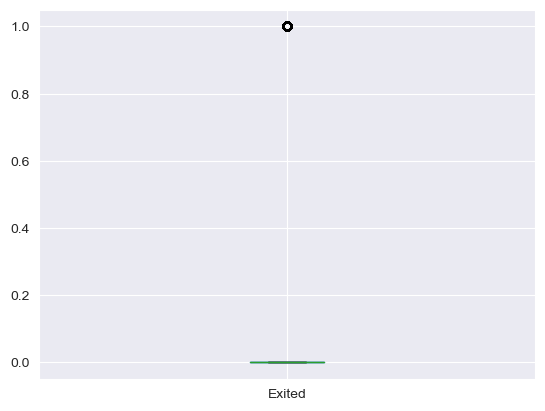

In [28]:
###CHECKING TO SEE IF THEE IS ANY OUTLIERS

Tesco_df.boxplot(column=["Exited"])

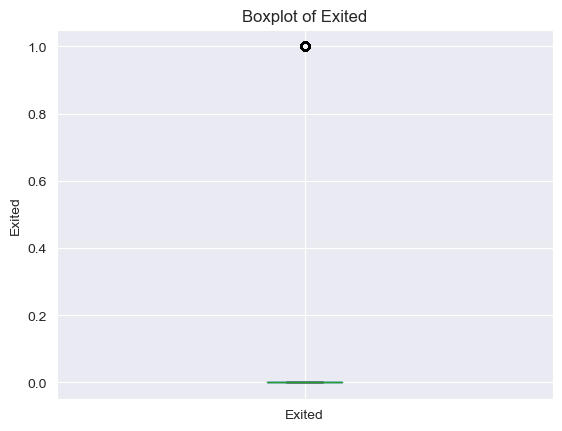

In [29]:
import matplotlib.pyplot as plt


Tesco_df.boxplot(column=["Exited"])

# Add title and labels
plt.title("Boxplot of Exited")
plt.ylabel("Exited")

# Show the plot
plt.show()


<Axes: >

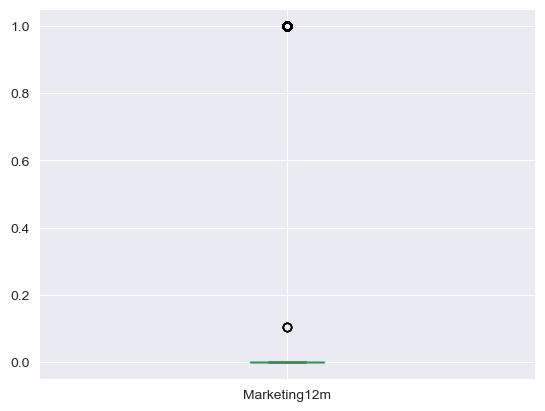

In [31]:


Tesco_df.boxplot(column=["Marketing12m"])

<Axes: xlabel='Exited', ylabel='Count'>

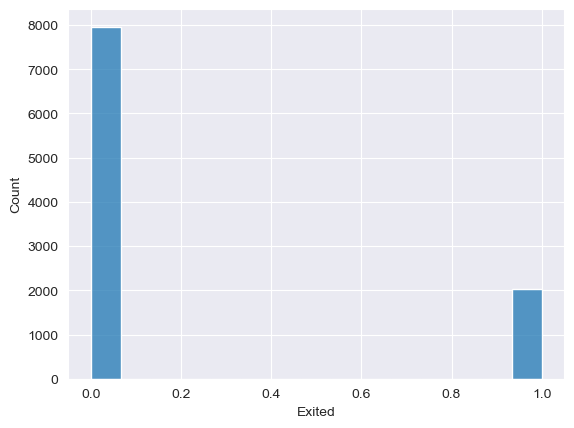

In [32]:
sns.histplot(Tesco_df["Exited"])

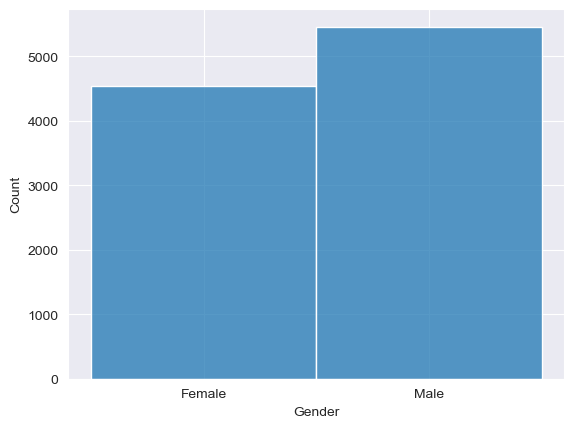

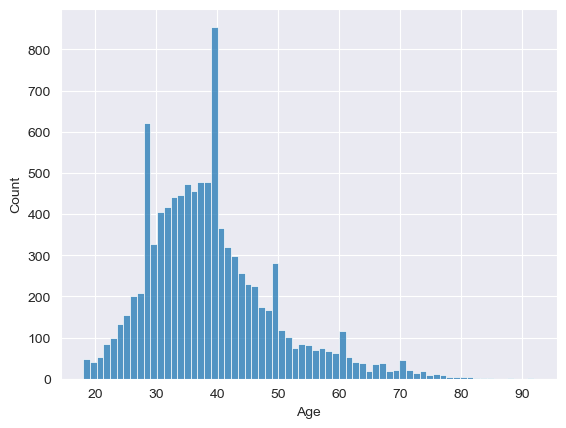

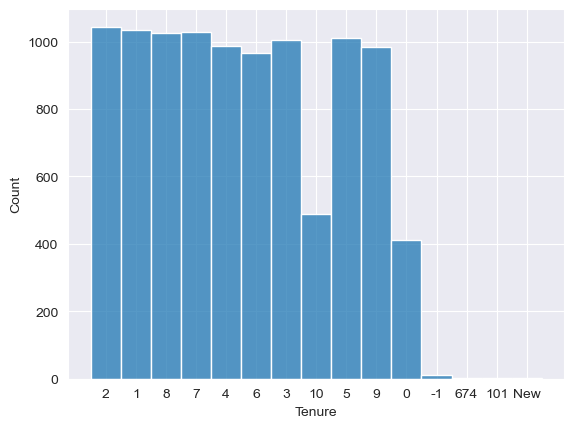

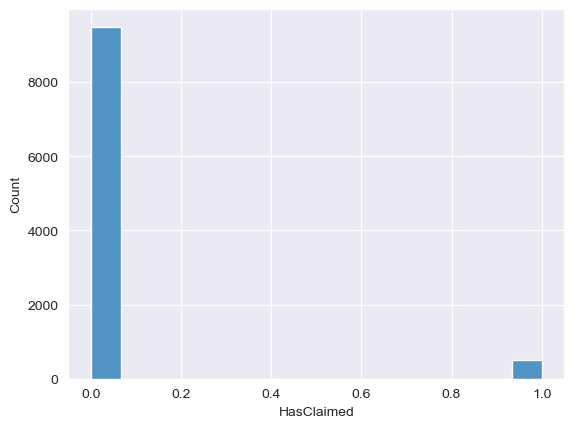

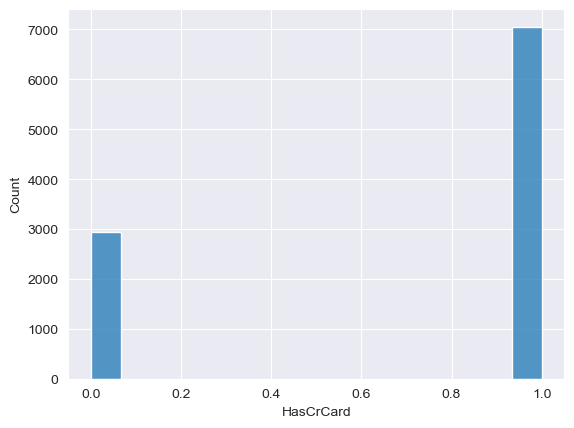

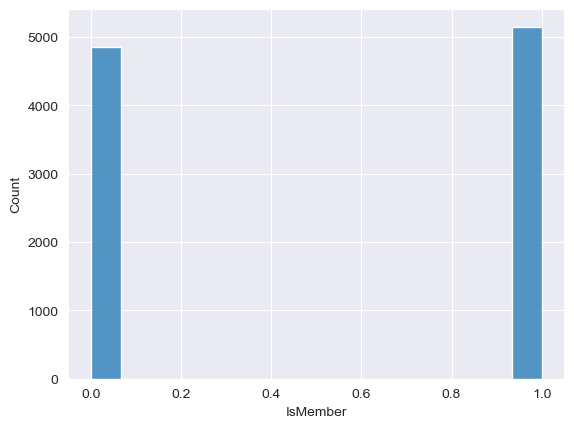

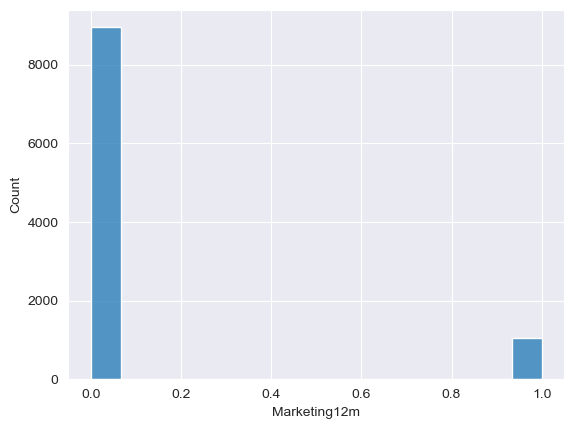

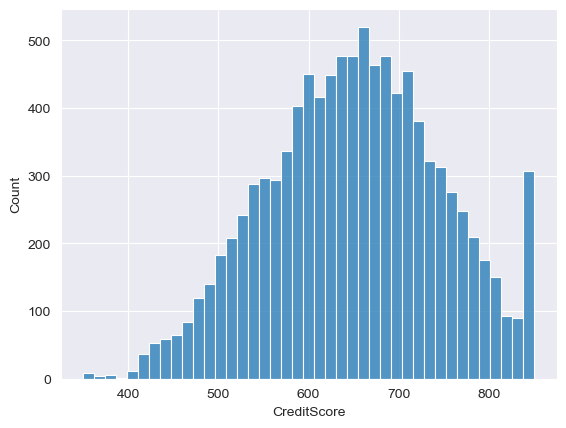

In [33]:
cols=["Gender", "Age", "Tenure",  "HasClaimed", "HasCrCard", "IsMember", "Marketing12m", "CreditScore"]
for i in cols:
    plt.figure()
    sns.histplot(Tesco_df[i])

C:\Users\lesle\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


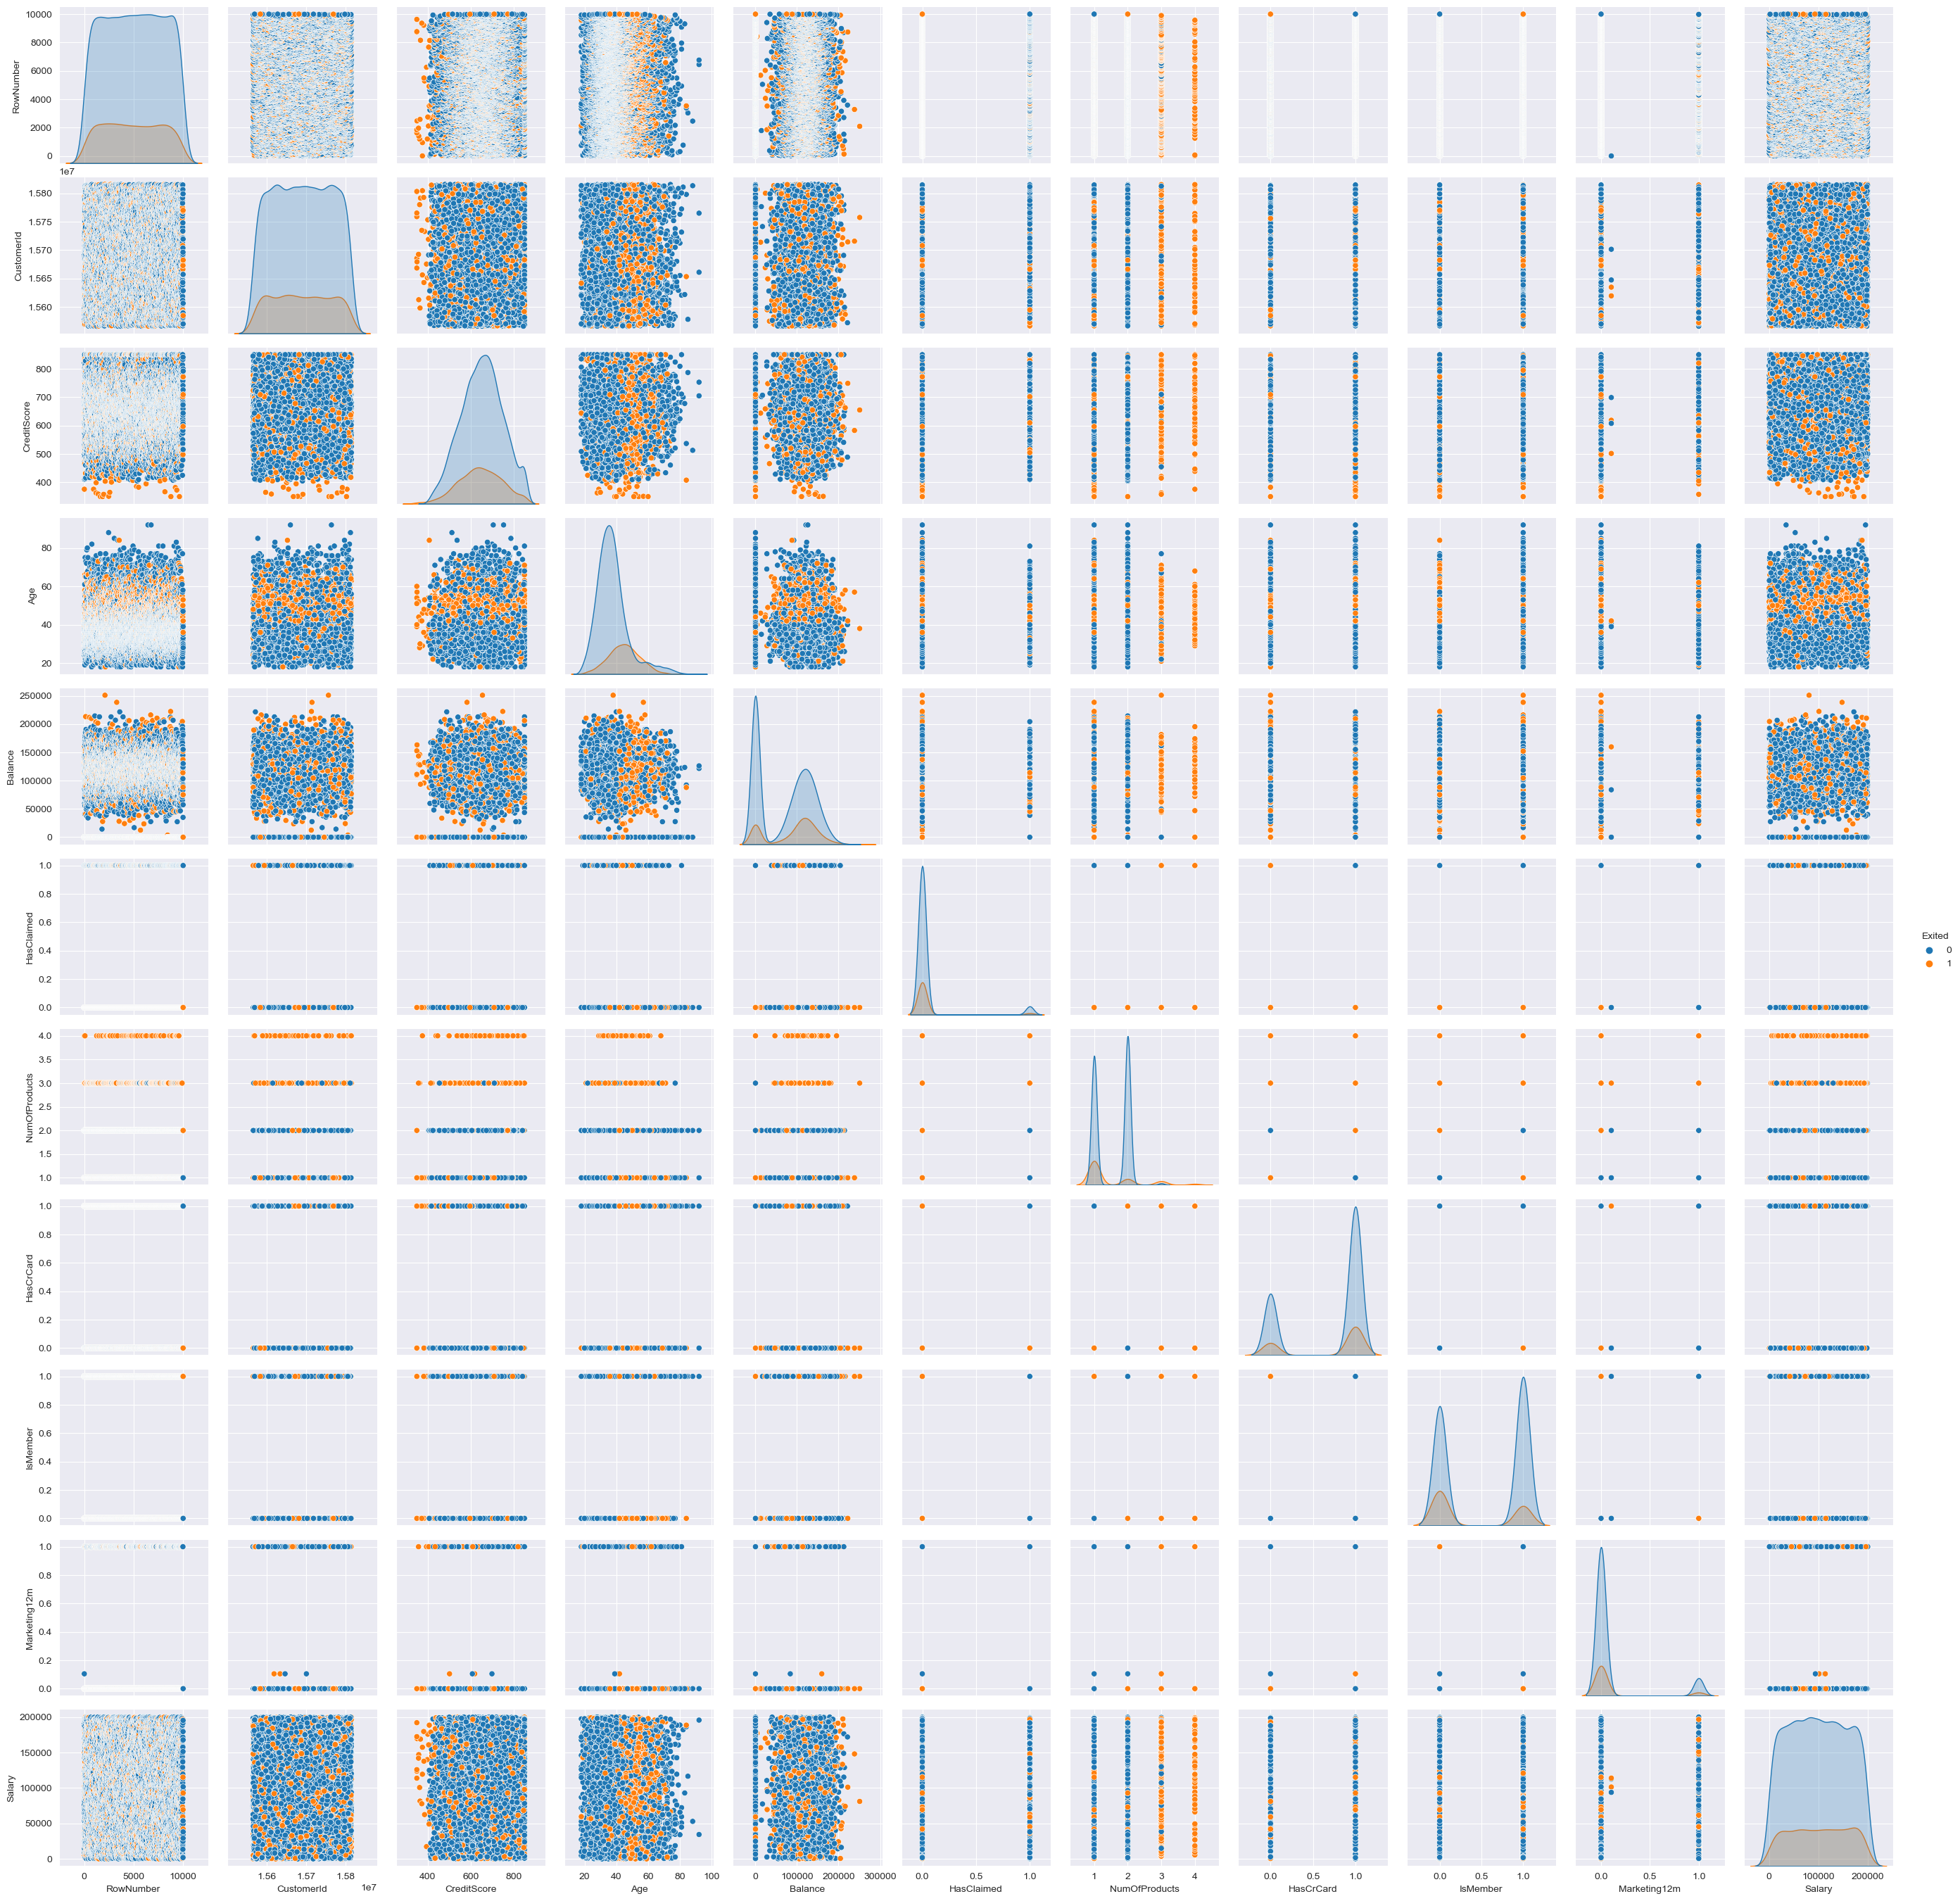

In [34]:
sns.pairplot(Tesco_df,hue="Exited")

In [35]:
###CORRELATION MATRIX BETWEEN ALL NUMERIC COLUMNS BUT FISRT WE NEED TO ENCODE THE DATA


columns_to_encode= ["Gender", "Surname", "Tenure", "Geography"]

label_encoder = LabelEncoder()

for col in columns_to_encode:
    Tesco_df[col] = label_encoder.fit_transform(Tesco_df[col])

In [37]:
###CHECKING TO SEE IF IT WORKED

Tesco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowNumber      10000 non-null  int64  
 1   CustomerId     10000 non-null  int64  
 2   Surname        10000 non-null  int32  
 3   CreditScore    10000 non-null  int64  
 4   Geography      10000 non-null  int32  
 5   Gender         10000 non-null  int32  
 6   Age            10000 non-null  int64  
 7   Tenure         10000 non-null  int32  
 8   Balance        10000 non-null  float64
 9   HasClaimed     10000 non-null  int64  
 10  NumOfProducts  10000 non-null  int64  
 11  HasCrCard      10000 non-null  int64  
 12  IsMember       10000 non-null  int64  
 13  Marketing12m   10000 non-null  float64
 14  Salary         10000 non-null  float64
 15  Exited         10000 non-null  int64  
dtypes: float64(3), int32(4), int64(9)
memory usage: 1.1 MB


In [46]:
### NOW FINDING THE CORRELATION MATRIX BETWEEN ALL NUMERIC COLUMNS 

Tesco_df.corr(method = "spearman")

RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber       1.000000    0.004187  0.001825     0.005130  -0.006494   
CustomerId      0.004187    1.000000  0.005316     0.005967   0.001878   
Surname         0.001825    0.005316  1.000000     0.006685  -0.014996   
CreditScore     0.005130    0.005967  0.006685     1.000000   0.006523   
Geography      -0.006494    0.001878 -0.014996     0.006523   1.000000   
Gender          0.018196   -0.002624 -0.002143    -0.003011  -0.014796   
Age             0.000476    0.008775  0.001377    -0.007974   0.058722   
Tenure         -0.018253   -0.019783 -0.016483    -0.002132  -0.000309   
Balance        -0.009008   -0.014027 -0.000512     0.005191   0.302260   
HasClaimed      0.010587    0.017376 -0.013611    -0.006205  -0.020272   
NumOfProducts   0.008305    0.019297 -0.017283     0.012568  -0.015637   
HasCrCard       0.000599   -0.014023 -0.008938    -0.003802   0.003049   
IsMember        0.012044    0.001682  0.001377     0.024262  -0.010970   
Marketing12m   -0.048868   -0.014497 -0.004654     0.016823  -0.014153   
Salary         -0.006007    0.015246  0.011795     0.001237   0.006449   
Exited         -0.016571   -0.006264 -0.010983    -0.023289   0.145838   

                 Gender       Age    Tenure   Balance  HasClaimed  \
RowNumber      0.018196  0.000476 -0.018253 -0.009008    0.010587   
CustomerId    -0.002624  0.008775 -0.019783 -0.014027    0.017376   
Surname       -0.002143  0.001377 -0.016483 -0.000512   -0.013611   
CreditScore   -0.003011 -0.007974 -0.002132  0.005191   -0.006205   
Geography     -0.014796  0.058722 -0.000309  0.302260   -0.020272   
Gender         1.000000 -0.029785  0.028495  0.012616   -0.003779   
Age           -0.029785  1.000000 -0.016969  0.033760   -0.026108   
Tenure         0.028495 -0.016969  1.000000 -0.002646    0.012966   
Balance        0.012616  0.033760 -0.002646  1.000000    0.003882   
HasClaimed    -0.003779 -0.026108  0.012966  0.003882    1.000000   
NumOfProducts -0.012851 -0.058566  0.008790 -0.316583   -0.000029   
HasCrCard      0.005766 -0.015278  0.017474 -0.009969   -0.006990   
IsMember       0.022544  0.039839 -0.028179 -0.011098   -0.010627   
Marketing12m  -0.003772  0.001051 -0.008654 -0.002736    0.014727   
Salary        -0.008269 -0.002431  0.000088  0.011526   -0.002439   
Exited        -0.106512  0.323968 -0.015696  0.111067   -0.018207   

               NumOfProducts  HasCrCard  IsMember  Marketing12m    Salary  \
RowNumber           0.008305   0.000599  0.012044     -0.048868 -0.006007   
CustomerId          0.019297  -0.014023  0.001682     -0.014497  0.015246   
Surname            -0.017283  -0.008938  0.001377     -0.004654  0.011795   
CreditScore         0.012568  -0.003802  0.024262      0.016823  0.001237   
Geography          -0.015637   0.003049 -0.010970     -0.014153  0.006449   
Gender             -0.012851   0.005766  0.022544     -0.003772 -0.008269   
Age                -0.058566  -0.015278  0.039839      0.001051 -0.002431   
Tenure              0.008790   0.017474 -0.028179     -0.008654  0.000088   
Balance            -0.316583  -0.009969 -0.011098     -0.002736  0.011526   
HasClaimed         -0.000029  -0.006990 -0.010627      0.014727 -0.002439   
NumOfProducts       1.000000   0.003859  0.016292     -0.007013  0.012570   
HasCrCard           0.003859   1.000000 -0.011866     -0.001925 -0.010041   
IsMember            0.016292  -0.011866  1.000000      0.004670 -0.011469   
Marketing12m       -0.007013  -0.001925  0.004670      1.000000 -0.024818   
Salary              0.012570  -0.010041 -0.011469     -0.024818  1.000000   
Exited             -0.125282  -0.007138 -0.156128     -0.007300  0.012081   

                 Exited  
RowNumber     -0.016571  
CustomerId    -0.006264  
Surname       -0.010983  
CreditScore   -0.023289  
Geography      0.145838  
Gender        -0.106512  
Age            0.323968  
Tenure        -0.015696  
Balance        0.111067  
HasClaimed  

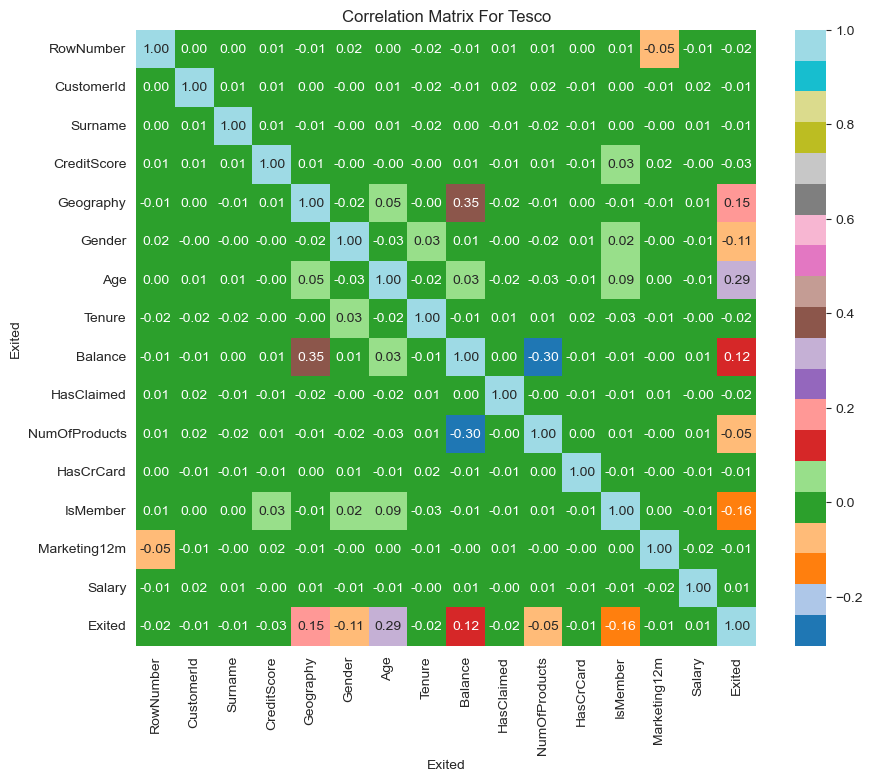

In [47]:
correlation_matrix = Tesco_df.corr()
sns.heatmap(correlation_matrix, cmap="tab20", annot=True, fmt=".2f")
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Correlation Matrix For Tesco")
plt.xlabel("Exited")
plt.ylabel("Exited")
plt.show()

In [48]:
correlation_matrix["Exited"].sort_values(ascending=False)

Exited           1.000000
Age              0.285323
Geography        0.154680
Balance          0.118323
Salary           0.012097
CustomerId      -0.006248
HasCrCard       -0.007138
Marketing12m    -0.008070
Surname         -0.010822
RowNumber       -0.016571
Tenure          -0.017675
HasClaimed      -0.018207
CreditScore     -0.027094
NumOfProducts   -0.047820
Gender          -0.106512
IsMember        -0.156128
Name: Exited, dtype: float64

In [49]:
###SPLITTING DATASET INTO TWO TRAINING AND TESTING WE WILL FIRST LIST THE COLUMNS

Tesco_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'HasClaimed', 'NumOfProducts',
       'HasCrCard', 'IsMember', 'Marketing12m', 'Salary', 'Exited'],
      dtype='object')

In [68]:
print(Tesco_df.head(2))
print(Tesco_df.shape)

   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          1       0   41   

   Tenure   Balance  HasClaimed  NumOfProducts  HasCrCard  IsMember  \
0       5      0.00           0              1          1         1   
1       2  83807.86           0              1          0         1   

   Marketing12m     Salary  Exited  
0      0.104642  101348.88       1  
1      0.104642  112542.58       0  
(10000, 16)


In [70]:
# Split the data into features (X) and target variable (y)
X = Tesco_df.iloc[:, :-1]
Y = Tesco_df.iloc[:, -1]

In [71]:
X.head()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          1       0   41   
2          3    15619304     2040          502          0       0   42   
3          4    15701354      289          699          0       0   39   
4          5    15737888     1822          850          1       0   43   

   Tenure    Balance  HasClaimed  NumOfProducts  HasCrCard  IsMember  \
0       5       0.00           0              1          1         1   
1       2   83807.86           0              1          0         1   
2      12  159660.80           0              3          1         0   
3       2       0.00           0              2          0         0   
4       5  125510.82           0              1          1         1   

   Marketing12m     Salary  
0      0.104642  101348.88  
1      0.104642  112542.58  
2      0.104642  113931.57  
3      0.104642   93826.63  
4      0.000000   79084.10

In [73]:
print(X.shape)
print(Y.shape)
print(X)
print(Y)


(10000, 15)
(10000,)
      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          1       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          1       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          2       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  HasClaimed  NumOfProducts  Ha

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowNumber      10000 non-null  int64  
 1   CustomerId     10000 non-null  int64  
 2   Surname        10000 non-null  int32  
 3   CreditScore    10000 non-null  int64  
 4   Geography      10000 non-null  int32  
 5   Gender         10000 non-null  int32  
 6   Age            10000 non-null  int64  
 7   Tenure         10000 non-null  int32  
 8   Balance        10000 non-null  float64
 9   HasClaimed     10000 non-null  int64  
 10  NumOfProducts  10000 non-null  int64  
 11  HasCrCard      10000 non-null  int64  
 12  IsMember       10000 non-null  int64  
 13  Marketing12m   10000 non-null  float64
 14  Salary         10000 non-null  float64
dtypes: float64(3), int32(4), int64(8)
memory usage: 1015.8 KB


In [75]:
###SPLITTING THE DATA SET INTO TWO
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [76]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_train:  (7500, 15)
Shape of X_test:  (2500, 15)
Shape of Y_train:  (7500,)
Shape of Y_test (2500,)


In [78]:
# Create classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC()
lr_classifier = LogisticRegression()

# Train the classifiers
rf_classifier.fit(X_train, Y_train)
svm_classifier.fit(X_train, Y_train)
lr_classifier.fit(X_train, Y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate metrics for each classifier
rf_accuracy = accuracy_score(Y_test, rf_predictions)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
lr_accuracy = accuracy_score(Y_test, lr_predictions)

rf_precision = precision_score(Y_test, rf_predictions)
svm_precision = precision_score(Y_test, svm_predictions)
lr_precision = precision_score(Y_test, lr_predictions)

rf_recall = recall_score(Y_test, rf_predictions)
svm_recall = recall_score(Y_test, svm_predictions)
lr_recall = recall_score(Y_test, lr_predictions)

rf_f1_score = f1_score(Y_test, rf_predictions)
svm_f1_score = f1_score(Y_test, svm_predictions)
lr_f1_score = f1_score(Y_test, lr_predictions)

C:\Users\lesle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lesle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# Create a DataFrame to display the results
data = {
    'Classifier': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision],
    'Recall': [rf_recall, svm_recall, lr_recall],
    'F1 Score': [rf_f1_score, svm_f1_score, lr_f1_score]
}

df = pd.DataFrame(data)

# Set the Classifier column as the index
df.set_index('Classifier', inplace=True)

# Display the results
print(df)

                     Accuracy  Precision    Recall  F1 Score
Classifier                                                  
Random Forest          0.8672   0.789474  0.452716  0.575448
SVM                    0.8012   0.000000  0.000000  0.000000
Logistic Regression    0.8012   0.000000  0.000000  0.000000
